In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import k3d
import numpy as np
import awkward as ak
import matplotlib.colors as mcolors

import pandas as pd


import mplhep as hep
#hep.set_style(hep.style.CMS)
hep.set_style("CMS")

In [2]:
#events = ur.open("50GeV_piplus.root:events")
#events = ur.open("sim_piplushcal.root:events")
events = ur.open('sim_pion.root:events')
#events = ur.open('sim_muon.root:events')
#events = ur.open('sim_electron.root:events')
#events = ur.open("rec_muonhcal.root:events")
#events.show()
arrays = events.arrays()#['KLMClusters.energy','KLMClusters.position.x','KLMClusters.position.y','KLMClusters.position.z','KLMClusters.nhits'])
#print(events.keys())

In [3]:
#Printing structure

In [4]:
arrays

<Array [{'mcparticles.ID': [0, ... ] type='10000 * {"mcparticles.ID": var * int3...'>

In [5]:
arrays['mcparticles.ps.z']

<Array [[50, 0, 50], [50, ... 50], [50, 0, 50]] type='10000 * var * float64'>

In [6]:
pz = ak.to_numpy(arrays['mcparticles.ps.z'][:,-1])
py = ak.to_numpy(arrays['mcparticles.ps.y'][:,-1])
px = ak.to_numpy(arrays['mcparticles.ps.x'][:,-1])
mass = ak.to_numpy(arrays['mcparticles.mass'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass

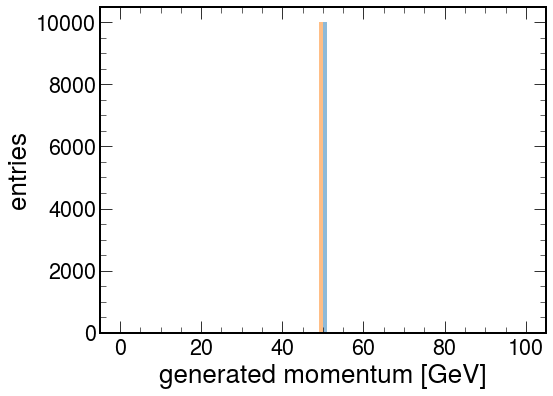

10000


In [7]:
fig = plt.figure( figsize=(8, 6))

plt.hist(p,range=(0,100),bins=100,alpha=0.5)
plt.hist(gen_E,range=(0,100),bins=100,alpha=0.5)

plt.xlabel('generated momentum [GeV]')
plt.ylabel('entries')
plt.show()
print(len(p))

## Hit level information


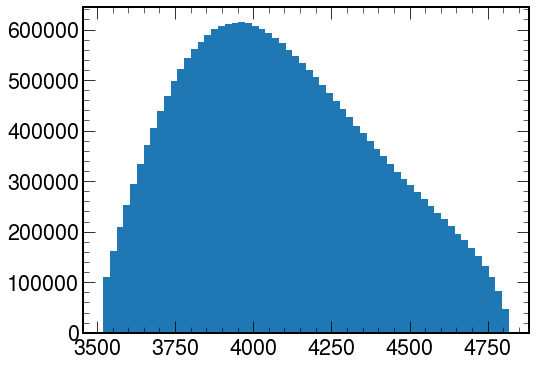

In [8]:
fig = plt.figure( figsize=(8, 6))

plt.hist(ak.flatten(arrays['HCALHits.position.z']),bins=60)
plt.show()

In [9]:
#Average hit energy, one per event. 
MIP =1.0# 1.25
#1MIP= 1 MeV  (2 MeV/cm)
#The thickness of the scintillator is 0.5 cm
#average per tile: 4 MeV (above 0.1 MeV)
#print(np.mean(averages))
#get a mask that selects all hits in the events that are larger than the average, 
#or larger than 5 MIPS

hits = 1000.0*arrays['HCALHits.energyDeposit'][:,:]

print('Hits energy [MeV] =', hits)


averages = ak.mean(hits,axis=-1)
print('Average hit energy in the event \n', averages)
print('Average over events =%2.2f MeV \n'%(1.0*np.mean(averages)))


mask_basic = hits >0.1*MIP
print('energy arrays masked =', hits[mask_basic])
print('Applying a mask for cell energies > 0.1 MIPs')
hits = hits[mask_basic]


averages = ak.mean(hits,axis=-1)
print('Average hit energy ', averages)
print('Average over events =%2.3f MeV'%(1.0*np.mean(averages)))
mask_AboveAverage = hits>averages[:]
mask_Above5MIPS = hits>5.0*MIP

print('hits above average', hits[mask_AboveAverage])
print('hits above 5 MIPS ', hits[mask_Above5MIPS])

#mask_AboveAverage= mask_AboveAverage*mask_basic
#mask_Above5MIPS = mask_Above5MIPS*mask_basic

#Number of hits in the event:
nhits = ak.num(hits)
nhits_AboveAverage = ak.num(hits[mask_AboveAverage])
nhits_Above5MIPS = ak.num(hits[mask_Above5MIPS])
C_th = nhits_Above5MIPS/nhits
C_av = nhits_AboveAverage/nhits
C_global = C_th/C_av
print('Len C', len(C_global))
energy = ak.sum(hits,axis=-1)
print('energy' , energy)


print('All hits above 0.1 MIP\n' , nhits)
print('#### Average number of hits above 0.1 MIP\n', np.mean(nhits))
print(' Fraction above 5 MIPS\n ', C_th)
print('#### Average hit fraction above 5 MIPS = %2.3f\n'%(np.mean(C_th)))
print(' Fraction above average \n', C_av)
print('#### Average hit fraction above average = %2.3f\n'%(np.mean(C_av)))

print('#### Average tile energy [MeV] \n', averages)
print('C global' , C_global)
print('#### Average C global=%2.3f\n'%(np.mean(C_global)))
#print(ak.num(arrays['HCALHitsReco.energy'][:100, :]))
#print(arrays['HCALHitsReco.energy'][:100, :])
#print(arrays['HCALHitsReco.energy'][:100, :][mask_AboveAverage])

Hits energy [MeV] = [[0.886, 0.807, 0.879, 0.835, 1.88, ... 0.000215, 0.0001, 1.46e-06, 7.88e-08]]
Average hit energy in the event 
 [0.737, 0.722, 0.534, 0.648, 0.789, 0.61, ... 0.713, 0.769, 1.03, 0.806, 0.662, 1.55]
Average over events =0.83 MeV 

energy arrays masked = [[0.886, 0.807, 0.879, 0.835, 1.88, 1.48, ... 0.875, 0.25, 0.236, 0.125, 0.56, 1.43]]
Applying a mask for cell energies > 0.1 MIPs
Average hit energy  [2.24, 2.65, 2.23, 2.52, 3.11, 2.28, 1.23, ... 2.74, 2.72, 2.97, 3.05, 2.62, 4.89]
Average over events =2.813 MeV
hits above average [[3.62, 2.52, 6.67, 6.53, 8.08, 3.04, 2.27, ... 23.2, 11.5, 6.93, 15.7, 24.2, 27.1]]
hits above 5 MIPS  [[6.67, 6.53, 8.08, 7.35, 11.2, 8.16, 6.91, ... 23.2, 11.5, 6.93, 15.7, 24.2, 27.1]]
Len C 10000
energy [1.42e+03, 1.86e+03, 1.62e+03, 1.82e+03, ... 1.83e+03, 1.76e+03, 1.84e+03, 1.18e+03]
All hits above 0.1 MIP
 [635, 701, 727, 721, 590, 732, 62, 676, ... 606, 569, 691, 618, 616, 577, 703, 241]
#### Average number of hits above 0.1 MIP

1.7067232779784325


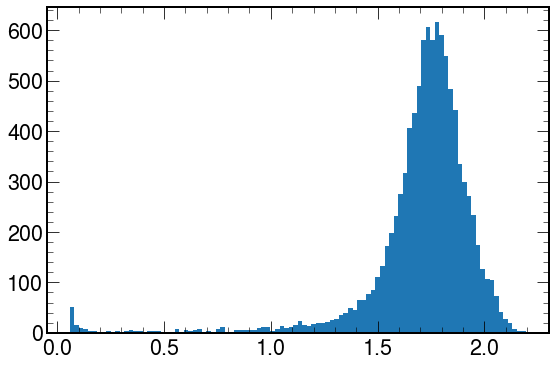

In [10]:
fig = plt.figure( figsize=(9, 6))

plt.hist(energy/1000.0,bins=100)#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
#plt.xlabel('$C_{global} = C_{th}/C_{av}$')
#plt.ylabel('HCAL energy [GeV]')
#plt.xlim([0,1.4])
#plt.ylim([0,2.5])
print(np.mean(energy/1000.0))

rescaled = (energy - np.mean(energy))/np.mean(energy)
plt.show()

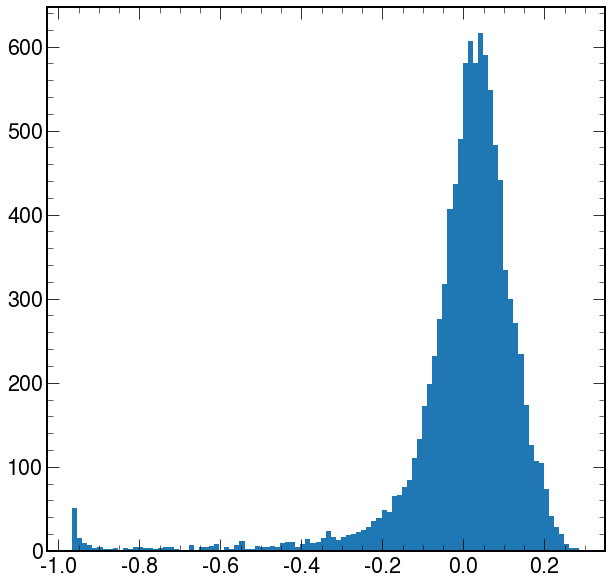

In [11]:
rescaled = (energy - np.mean(energy))/np.mean(energy)
plt.hist(rescaled,bins=100)
plt.show()

10000
10000
[0.372, 0.476, 0.407, 0.541, 0.664, 0.474, ... 0.487, 0.541, 0.695, 0.481, 0.974]


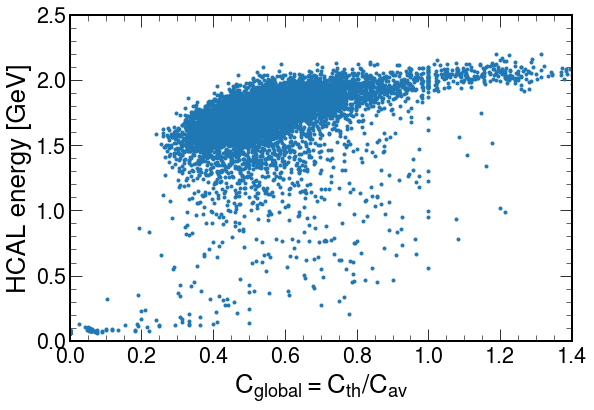

In [25]:
fig = plt.figure( figsize=(9, 6))

plt.plot(C_global,energy/1000.0,'.')#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
plt.xlabel('$C_{global} = C_{th}/C_{av}$')
plt.ylabel('HCAL energy [GeV]')
plt.xlim([0,1.4])
plt.ylim([0,2.5])
print(len(C_global))
print(len(energy))
print(C_global)

TypeError: no implementation found for 'numpy.histogram2d' on types that implement __array_function__: [<class 'awkward.highlevel.Array'>]

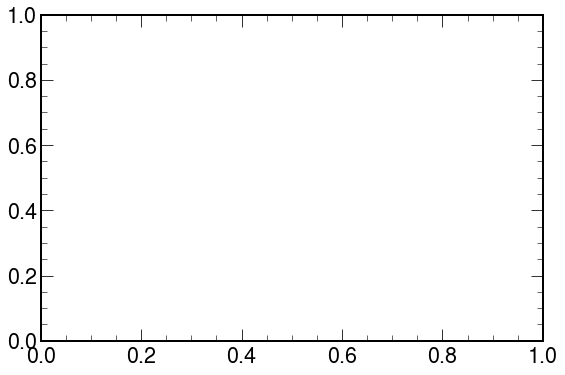

In [15]:
fig = plt.figure( figsize=(9, 6))

plt.hist2d(C_global,energy)
#plt.xlabel('$C_{global} = C_{th}/C_{av}$')
#plt.ylabel('HCAL energy [GeV]')
#plt.xlim([0,1.4])
#plt.ylim([0,2.5])

(-1, 0.6)

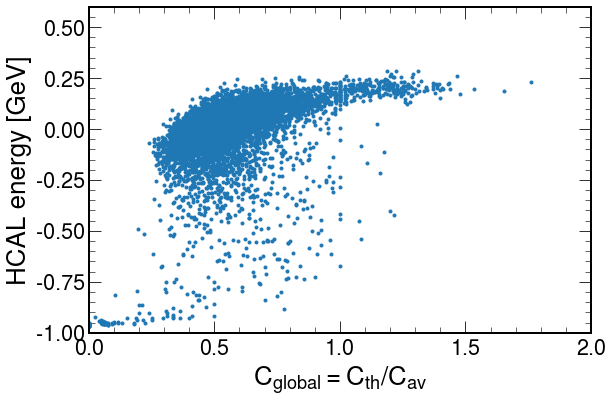

In [16]:
fig = plt.figure( figsize=(9, 6))

plt.plot(C_global,rescaled,'.')#energy = ak.sum(arrays['HCALHitsReco.energy'][:2, :],axis=-1)
plt.xlabel('$C_{global} = C_{th}/C_{av}$')
plt.ylabel('HCAL energy [GeV]')
plt.xlim([0,2.0])
plt.ylim([-1,0.6])

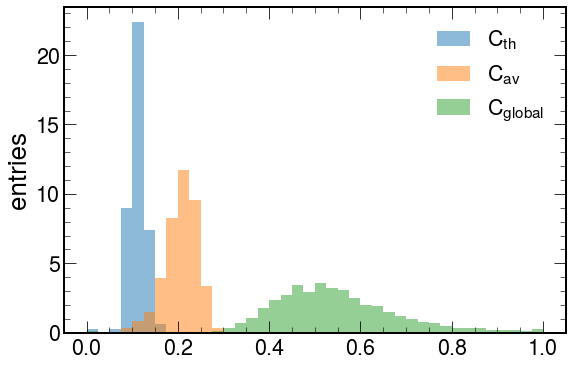

In [17]:
fig = plt.figure( figsize=(9, 6))

plt.hist(C_th,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{th}$')
plt.hist(C_av,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{av}$')
plt.hist(C_global,bins=40,range=(0,1),alpha=0.5,density=True,label='$C_{global}$')
plt.legend()
plt.ylabel('entries')
plt.show()

10000
10000
628.2174


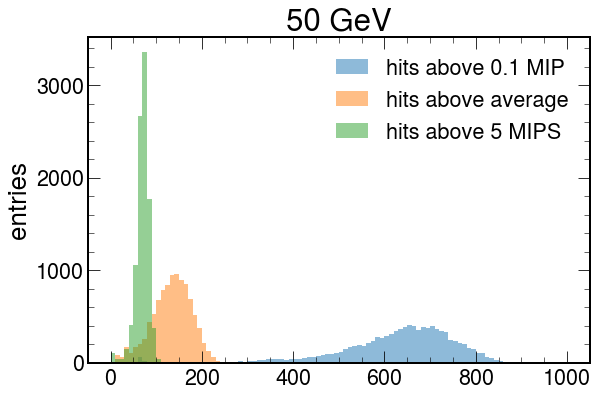

In [18]:
fig = plt.figure( figsize=(9, 6))
plt.hist(nhits,bins=100,range=(0,1000),alpha=0.5,label='hits above 0.1 MIP')
plt.hist(nhits_AboveAverage,bins=100,range=(0,1000),alpha=0.5,label='hits above average')
plt.hist(nhits_Above5MIPS,bins=100,range=(0,1000),alpha=0.5,label='hits above 5 MIPS')
plt.legend()
plt.title('50 GeV')
plt.ylabel('entries')
#plt.yscale('log')
print(len(nhits))
print(len(nhits_AboveAverage))
print(np.mean(nhits))

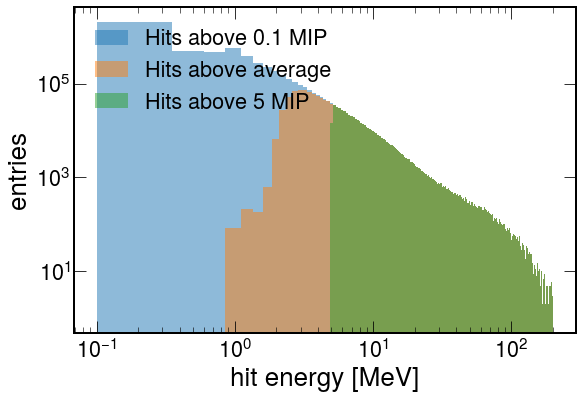

Average energy:  2.7167717385389722
Average energy:  2.8125145216639447


In [24]:
fig = plt.figure( figsize=(9, 6))
plt.hist(ak.flatten(hits),bins=800,range=(0.1,200),alpha=0.5,label='Hits above 0.1 MIP')
plt.hist(ak.flatten(hits[mask_AboveAverage]),range=(0.1,200),bins=800,alpha=0.5,label='Hits above average')
plt.hist(ak.flatten(hits[mask_Above5MIPS]),range=(0.1,200),bins=800,alpha=0.5,label='Hits above 5 MIP')

#plt.axhline(x=MIP)
plt.legend(loc='best')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('entries')
plt.xlabel('hit energy [MeV]')
plt.show()

print('Average energy: ', np.mean(ak.flatten(hits)))
print('Average energy: ', np.mean(ak.mean(hits,axis=-1)))

In [ ]:
pz = ak.to_numpy(arrays['mcparticles.ps.z'][:,-1])
py = ak.to_numpy(arrays['mcparticles.ps.y'][:,-1])
px = ak.to_numpy(arrays['mcparticles.ps.x'][:,-1])
mass = ak.to_numpy(arrays['mcparticles.mass'][:,-1])
p = np.sqrt(px*px + py*py+ pz*pz)
gen_E = np.sqrt(p*p + mass*mass)-mass
print(len(p))


## Cluster info

In [ ]:
fig = plt.figure( figsize=(8, 6))

for i in [(50,60),(60,70),(70,80)]:
    energymask_do = p>i[0] 
    energymask_up = p<i[1]
    energymask = energymask_do * energymask_up
    mask_total = mask * energymask
    plt.hist(ak.flatten(arrays[mask_total]['HCALHitsReco.local.z']),range=(-600,600),bins=120,density=True,alpha=0.5)
plt.show()


In [ ]:
print(len(ak.flatten(arrays[mask_total]['HCALHitsReco.energy'])))
print(len(ak.flatten(arrays[mask_total]['HCALHitsReco.position.x'])))

In [ ]:
ak.flatten(arrays[mask_total]['HCALHitsReco.energy']).to_numpy()

In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist2d(ak.flatten(arrays[mask_total]['HCALHitsReco.local.z']).to_numpy(),
           ak.flatten(arrays[mask_total]['HCALHitsReco.local.y']).to_numpy(), bins=121,
           range=[[-600,600],[-1500,1500]],
           norm=mcolors.PowerNorm(1.0)
          )
plt.colorbar(norm=mcolors.PowerNorm(1.0))

plt.xlabel('z position [cm]')
plt.ylabel('y position [cm]')

plt.show()


In [ ]:
energymask_do = p>40
energymask_up = p<60
energymask = energymask_do * energymask_up
mask_total = mask * energymask

In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist2d(arrays[mask_total]['HCALHitsReco.local.x'][2].to_numpy(),
           arrays[mask_total]['HCALHitsReco.local.y'][2].to_numpy(), bins=121,
           range=[[-720,720],[-720,720]],
           norm=mcolors.PowerNorm(.50)
          )
plt.colorbar(norm=mcolors.PowerNorm(.50))

plt.xlabel('x position [cm]')
plt.ylabel('y position [cm]')

plt.show()

In [ ]:
arrays[mask_total]['HCALHitsReco.time'][4].to_numpy()


In [ ]:
fig,axs = plt.subplots(2,4, figsize=(20, 10),sharey=True,sharex=True,gridspec_kw={'wspace':0, 'hspace':0})
ax = axs.flatten()
for i in range(0,8):
    x = arrays[mask_total]['HCALHitsReco.local.x'][i+10].to_numpy()
    y = arrays[mask_total]['HCALHitsReco.local.y'][i+10].to_numpy()
    z= arrays[mask_total]['HCALHitsReco.local.z'][i+10].to_numpy()
    E= arrays[mask_total]['HCALHitsReco.energy'][i+10].to_numpy()

    cmhot = plt.get_cmap("viridis")
    cax = ax[i].scatter(z,y, c=E*1000, cmap=cmhot)
    ax[i].set_xlim([-1000,1000])
    ax[i].set_ylim([-1000,1000])
    #ax[i].set_plt.colorbar()
    #ax[i].set_clim(-1,50)
    cax.set_clim(vmin=0, vmax=50)
    
    
    
    
   
    
ax[0].set_ylabel('y position [cm]')
ax[4].set_ylabel('y position [cm]')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


In [ ]:
fig,ax = plt.subplots(1,5, figsize=(30, 6),sharey=True,sharex=True)

for n,i in enumerate([(40,60),(60,70)]):
    print(i)
    print(n)
    energymask_do = p>i[0] 
    energymask_up = p<i[1]
    energymask = energymask_do * energymask_up
    mask_total = mask * energymask
    print(len(ak.flatten(arrays[mask_total]['HCALHitsReco.local.z']).to_numpy()))
    ax[n].hist2d(ak.flatten(arrays[mask_total]['HCALHitsReco.local.z']).to_numpy(),
           ak.flatten(arrays[mask_total]['HCALHitsReco.local.y']).to_numpy(), bins=[121,61],
                                                                                
           range=[[-1000,1000],[-1000,1000]],
           #norm=mcolors.PowerNorm(.60)
          )
    #plt.colorbar(norm=mcolors.PowerNorm(1.0))

    ax[n].set_xlabel('z position [cm]')
    ax[n].set_title("%2.0f-%2.0f GeV"%(i[0], i[1]))
    ax[0].set_ylabel('y position [cm]')
#plt.colorbar(norm=mcolors.PowerNorm(0.4))

In [ ]:
import pandas as pd

df = {}
df['reco_E'] =  arrays[mask]['HCALClusters.energy'][:,0].to_numpy()
df['reco_theta'] =  arrays[mask]['HCALClusters.polar.theta'][:,0].to_numpy()

df['gen_p'] = p
df['nhits'] = arrays[mask]['HCALClusters.nhits'][:,0].to_numpy()
df = pd.DataFrame.from_dict(df)
df.eval('rel_res = reco_E/gen_p',inplace=True)
df.head()

In [ ]:

df = {}
df['reco_E'] =  arrays[mask]['HCALClusters.energy'][:,0].to_numpy()
df['reco_theta'] =  arrays[mask]['HCALClusters.polar.theta'][:,0].to_numpy()

df['gen_p'] = p
df['nhits'] = arrays[mask]['HCALClusters.nhits'][:,0].to_numpy()
df = pd.DataFrame.from_dict(df)
df.eval('rel_res = reco_E/gen_p',inplace=True)
df.head()

In [ ]:
fig = plt.figure( figsize=(8, 6))
plt.hist2d(df['reco_E'],df['nhits'],bins=50)
plt.xlabel('reconstructed E [GeV]')
plt.ylabel('number of hits')
plt.show()

In [ ]:
from scipy import stats

fig = plt.figure( figsize=(8, 6))
temp = df.groupby(pd.cut(df['gen_p'], bins=np.geomspace(1,100,12)))['rel_res']
trim_mean = temp.apply(stats.trim_mean, 0.05)
trim_std = temp.apply(stats.mstats.trimmed_std, limits=(0.05,0.05))
temp = temp.agg(['mean', 'std', 'size']).reset_index()


x = [i.mid for i in temp['gen_p']]
print (x)
#plt.plot(x,temp['mean'],'o-',label='JES')
#plt.plot(x,trim_mean,'o-',label='Jet energy scale')

plt.plot(x,temp['std']/temp['mean'],'o-',label='STD')
plt.plot(x, trim_std/trim_mean,'o-',label='90% STD')
plt.xlabel('Generated energy [GeV]',fontsize=22)
plt.legend(fontsize=22)
#plt.title(r"$\bf{ATHENA}$"+' full simulation [DD4hep]',fontsize=22)
plt.grid()
plt.ylabel('Relative energy resolution')
plt.ylim([0.0,0.2])

def stochastic(a,b):
    return a/np.sqrt(b) +0.034

#energy = np.linspace(1,10,100)
#plt.plot(energy, stochastic(0.34,energy))
plt.tight_layout()
plt.show()


fig = plt.figure( figsize=(8, 6))
plt.plot(x,temp['mean'],'o-',label='STD')
plt.plot(x,trim_mean,'o-',label='STD')


In [ ]:
fig = plt.figure( figsize=(8, 6))

plt.hist(df.query('gen_p<20')['reco_E'],bins=50,range=(0,5),density=True,alpha=0.5,label='0-2 GeV')
plt.hist(df.query('gen_p>20 and gen_p<40')['reco_E'],bins=50,range=(0,5),density=True,alpha=0.5,label='2-4 GeV'
        )
plt.hist(df.query('gen_p>40 and gen_p<60')['reco_E'],bins=50,range=(0,5),density=True,alpha=0.5,label='4-6 GeV')
plt.hist(df.query('gen_p>60 and gen_p<80')['reco_E'],bins=50,range=(0,5),density=True,alpha=0.5,label='6-8 GeV')
plt.hist(df.query('gen_p>80 and gen_p<100')['reco_E'],bins=50,range=(0,5),density=True,alpha=0.5,label='8-10 GeV')
plt.legend()
plt.xlabel('Reconstructed energy [GeV]')
plt.ylabel('normalized entries')
plt.show()